In [18]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [19]:
"""
This function performs the Runge-Kutta method for solving the given 
differential equations given for the spring stretch and the swing degrees of 
freedom. 

Substitution for Runge-Kutta:
Y_1 = stretch
Y_2 = stretch'
Z_1 = swing
Z_2 = swing'

Y_1' = stretch' = Y_2               # function f below
Y_2' = stretch'' = equation given   # function fPrime below
Z_1' = swing' = Y_2                 # function g below
Z_2' = swing'' = equation given     # function gPrime below

Arguments:  
totTime / h                     # total time & step size (seconds)
pendMass                        # pendulum mass (kilograms)
springConst                     # spring constant (Newtons/meter)
length                          # unstretched pendulum length (meters)
initStretch / initStretchPrime  # beginning stretch & derivative (meters)
gravAccel                       # acceleration from gravity (meters/second^2)
initSwing / initSwingPrime      # swing degrees of freedom & derivative (degrees)

"""

"\nThis function performs the Runge-Kutta method for solving the given \ndifferential equations given for the spring stretch and the swing degrees of \nfreedom. \n\nSubstitution for Runge-Kutta:\nY_1 = stretch\nY_2 = stretch'\nZ_1 = swing\nZ_2 = swing'\n\nY_1' = stretch' = Y_2               # function f below\nY_2' = stretch'' = equation given   # function fPrime below\nZ_1' = swing' = Y_2                 # function g below\nZ_2' = swing'' = equation given     # function gPrime below\n\nArguments:  \ntotTime / h                     # total time & step size (seconds)\npendMass                        # pendulum mass (kilograms)\nspringConst                     # spring constant (Newtons/meter)\nlength                          # unstretched pendulum length (meters)\ninitStretch / initStretchPrime  # beginning stretch & derivative (meters)\ngravAccel                       # acceleration from gravity (meters/second^2)\ninitSwing / initSwingPrime      # swing degrees of freedom & derivative 

In [20]:
def RungeKutta(totTime, h, pendMass, springConst, length, initStretch, 
               initStretchPrime, gravAccel, initSwing, initSwingPrime):
    
    # Step array
    time=np.arange(0, totTime, h)

    # Solution arrays with initial values
    Y_1=[initStretch]
    Y_2=[initStretchPrime]
    Z_1=[initSwing]
    Z_2=[initSwingPrime]

    #==========================================================================
    # System of first order equations
    def f(stretch, y1, y2, z1, z2, pendMass, springConst, length, gravAccel):
        return y2
    
    def fPrime(stretch, y1, y2, z1, z2, pendMass, springConst, length, gravAccel):
        return -(springConst/pendMass)*y1+(length+y1)*(z2**2)+gravAccel*math.cos( z1 )
    
    def g(stretch, y1, y2, z1, z2, pendMass, springConst, length, gravAccel):
        return z2
    
    def gPrime(stretch, y1, y2, z1, z2, pendMass, springConst, length, gravAccel):
        return -((gravAccel*math.sin( z1 )-2*y2*z2)/(length+y1))

    #==========================================================================
    # k functions
    def k1(tn, y1n, y2n, z1n, z2n, pendMass, springConst, length, gravAccel):
        return h*f(tn, y1n, y2n, z1n, z2n, pendMass, springConst, length, gravAccel)
    
    def k2(tn, y1n, y2n, z1n, z2n, pendMass, springConst, length, gravAccel):
        return h*f(tn+h/2, y1n+k1(tn, y1n, y2n, z1n, z2n, pendMass, springConst, 
               length, gravAccel)/2, y2n+l1(tn, y1n, y2n, z1n, z2n, pendMass, 
               springConst, length, gravAccel)/2, z1n+p1(tn, y1n, y2n, z1n, z2n, 
               pendMass, springConst, length, gravAccel)/2, z2n+q1(tn, y1n, y2n, 
               z1n, z2n, pendMass, springConst, length, gravAccel) /2, pendMass, 
               springConst, length, gravAccel)
    
    def k3(tn, y1n, y2n, z1n, z2n, pendMass, springConst, length, gravAccel):
        return h*f(tn+h/2, y1n+k2(tn, y1n, y2n, z1n, z2n, pendMass, springConst, 
               length, gravAccel)/2, y2n+l2(tn, y1n, y2n, z1n, z2n, pendMass, 
               springConst, length, gravAccel)/2, z1n+p2(tn, y1n, y2n, z1n, z2n, 
               pendMass, springConst, length, gravAccel)/2, z2n+q2(tn, y1n, y2n, 
               z1n, z2n, pendMass, springConst, length, gravAccel)/2, pendMass, 
               springConst, length, gravAccel)
    
    def k4(tn, y1n, y2n, z1n, z2n, pendMass, springConst, length, gravAccel):
        return h*f(tn+h, y1n+k3(tn, y1n, y2n, z1n, z2n, pendMass, springConst, 
               length, gravAccel), y2n+l3(tn, y1n, y2n, z1n, z2n, pendMass, 
               springConst, length, gravAccel), z1n+p3(tn, y1n, y2n, z1n, z2n, 
               pendMass, springConst, length, gravAccel), z2n+q3(tn, y1n, y2n, 
               z1n, z2n, pendMass, springConst, length, gravAccel), pendMass, 
               springConst, length, gravAccel)
    
    def k(tn, y1n, y2n, z1n, z2n, pendMass, springConst, length, gravAccel):
        return (1.0/6.0)*(k1(tn, y1n, y2n, z1n, z2n, pendMass, springConst, 
               length, gravAccel )+2*k2(tn, y1n, y2n, z1n, z2n, pendMass, 
               springConst, length, gravAccel)+2*k3(tn, y1n, y2n, z1n, z2n, 
               pendMass, springConst, length, gravAccel)+k4(tn, y1n, y2n, z1n, 
               z2n, pendMass, springConst, length, gravAccel))
    
    #--------------------------------------------------------------------------
    # l functions
    def l1(tn, y1n, y2n, z1n, z2n, pendMass, springConst, length, gravAccel):
        return h*fPrime(tn, y1n, y2n, z1n, z2n, pendMass, springConst, length, gravAccel)
    
    def l2(tn, y1n, y2n, z1n, z2n, pendMass, springConst, length, gravAccel):
        return h*fPrime(tn+h/2, y1n+k1(tn, y1n, y2n, z1n, z2n, pendMass, 
               springConst, length, gravAccel)/2, y2n+l1(tn, y1n, y2n, z1n, 
               z2n, pendMass, springConst, length, gravAccel)/2, z1n+p1(tn, 
               y1n, y2n, z1n, z2n, pendMass, springConst, length, gravAccel )/2,
               z2n+q1(tn, y1n, y2n, z1n, z2n, pendMass, springConst, length, 
               gravAccel)/2, pendMass, springConst, length, gravAccel)
    
    def l3(tn, y1n, y2n, z1n, z2n, pendMass, springConst, length, gravAccel):
        return h*fPrime(tn+h/2, y1n+k2(tn, y1n, y2n, z1n, z2n, pendMass, 
               springConst, length, gravAccel)/2, y2n+l2(tn, y1n, y2n, z1n, 
               z2n, pendMass, springConst, length, gravAccel)/2, z1n+p2(tn, 
               y1n, y2n, z1n, z2n, pendMass, springConst, length, gravAccel)/2, 
               z2n+q2(tn, y1n, y2n, z1n, z2n, pendMass, springConst, length, 
               gravAccel)/2, pendMass, springConst, length, gravAccel)
    
    def l4(tn, y1n, y2n, z1n, z2n, pendMass, springConst, length, gravAccel):
        return h*fPrime(tn+h, y1n+k3(tn, y1n, y2n, z1n, z2n, pendMass, 
               springConst, length, gravAccel), y2n+l3(tn, y1n, y2n, z1n, z2n, 
               pendMass, springConst, length, gravAccel), z1n+p3(tn, y1n, y2n, 
               z1n, z2n, pendMass, springConst, length, gravAccel), z2n+q3(tn, 
               y1n, y2n, z1n, z2n, pendMass, springConst, length, gravAccel), 
               pendMass, springConst, length, gravAccel)
    
    def l(tn, y1n, y2n, z1n, z2n, pendMass, springConst, length, gravAccel):        
        return (1.0/6.0)*(l1(tn, y1n, y2n, z1n, z2n, pendMass, springConst, 
               length, gravAccel)+2*l2(tn, y1n, y2n, z1n, z2n, pendMass, 
               springConst, length, gravAccel)+2*l3(tn, y1n, y2n, z1n, z2n, 
               pendMass, springConst, length, gravAccel)+l4(tn, y1n, y2n, z1n, 
               z2n, pendMass, springConst, length, gravAccel))
    
    #--------------------------------------------------------------------------
    # p functions
    def p1(tn, y1n, y2n, z1n, z2n, pendMass, springConst, length, gravAccel):
        return h*g(tn, y1n, y2n, z1n, z2n, pendMass, springConst, length, gravAccel)
    
    def p2(tn, y1n, y2n, z1n, z2n, pendMass, springConst, length, gravAccel):
        return h*g(tn+h/2, y1n+k1(tn, y1n, y2n, z1n, z2n, pendMass, springConst,
               length, gravAccel)/2, y2n+l1(tn, y1n, y2n, z1n, z2n, pendMass, 
               springConst, length, gravAccel)/2, z1n+p1(tn, y1n, y2n, z1n, z2n,
               pendMass, springConst, length, gravAccel)/2, z2n+q1(tn, y1n, y2n, 
               z1n, z2n, pendMass, springConst, length, gravAccel)/2, pendMass, 
               springConst, length, gravAccel)
    
    def p3(tn, y1n, y2n, z1n, z2n, pendMass, springConst, length, gravAccel):
        return h*g(tn+h/2, y1n+k2(tn, y1n, y2n, z1n, z2n, pendMass, springConst, 
               length, gravAccel)/2, y2n+l2(tn, y1n, y2n, z1n, z2n, pendMass, 
               springConst, length, gravAccel)/2, z1n+p2(tn, y1n, y2n, z1n, z2n, 
               pendMass, springConst, length, gravAccel)/2, z2n+q2(tn, y1n, y2n, 
               z1n, z2n, pendMass, springConst, length, gravAccel)/2, pendMass, 
               springConst, length, gravAccel)
    
    def p4(tn, y1n, y2n, z1n, z2n, pendMass, springConst, length, gravAccel):
        return h*g(tn+h, y1n+k3(tn, y1n, y2n, z1n, z2n, pendMass, springConst, 
               length, gravAccel), y2n+l3(tn, y1n, y2n, z1n, z2n, pendMass, 
               springConst, length, gravAccel), z1n+p3(tn, y1n, y2n, z1n, z2n, 
               pendMass, springConst, length, gravAccel), z2n+q3(tn, y1n, y2n, 
               z1n, z2n, pendMass, springConst, length, gravAccel), pendMass, 
               springConst, length, gravAccel)
    
    def p(tn, y1n, y2n, z1n, z2n, pendMass, springConst, length, gravAccel):
        return (1.0/6.0)*(k1(tn, y1n, y2n, z1n, z2n, pendMass, springConst, 
               length, gravAccel)+2*k2(tn, y1n, y2n, z1n, z2n, pendMass, 
               springConst, length, gravAccel)+2*k3(tn, y1n, y2n, z1n, z2n, 
               pendMass, springConst, length, gravAccel)+k4(tn, y1n, y2n, z1n, 
               z2n, pendMass, springConst, length, gravAccel))
    
    #--------------------------------------------------------------------------
    # q functions
    def q1(tn, y1n, y2n, z1n, z2n, pendMass, springConst, length, gravAccel):
        return h*gPrime(tn, y1n, y2n, z1n, z2n, pendMass, springConst, length, gravAccel)
    
    def q2(tn, y1n, y2n, z1n, z2n, pendMass, springConst, length, gravAccel):
        return h*gPrime(tn+h/2, y1n+k1(tn, y1n, y2n, z1n, z2n, pendMass, 
               springConst, length, gravAccel)/2, y2n+l1(tn, y1n, y2n, z1n, z2n, 
               pendMass, springConst, length, gravAccel)/2, z1n+p1(tn, y1n, y2n, 
               z1n, z2n, pendMass, springConst, length, gravAccel)/2, z2n+q1(tn, 
               y1n, y2n, z1n, z2n, pendMass, springConst, length, gravAccel)/2, 
               pendMass, springConst, length, gravAccel)
    
    def q3(tn, y1n, y2n, z1n, z2n, pendMass, springConst, length, gravAccel):
        return h*gPrime(tn+h/2, y1n+k2(tn, y1n, y2n, z1n, z2n, pendMass, 
               springConst, length, gravAccel)/2, y2n+l2(tn, y1n, y2n, z1n, z2n, 
               pendMass, springConst, length, gravAccel)/2, z1n+p2(tn, y1n, y2n, 
               z1n, z2n, pendMass, springConst, length, gravAccel)/2, z2n+q2(tn, 
               y1n, y2n, z1n, z2n, pendMass, springConst, length, gravAccel)/2, 
               pendMass, springConst, length, gravAccel)
    
    def q4(tn, y1n, y2n, z1n, z2n, pendMass, springConst, length, gravAccel):
        return h*gPrime(tn+h, y1n+k3(tn, y1n, y2n, z1n, z2n, pendMass, 
               springConst, length, gravAccel), y2n+l3(tn, y1n, y2n, z1n, z2n, 
               pendMass, springConst, length, gravAccel), z1n+p3(tn, y1n, y2n, 
               z1n, z2n, pendMass, springConst, length, gravAccel), z2n+q3(tn, 
               y1n, y2n, z1n, z2n, pendMass, springConst, length, gravAccel), 
               pendMass, springConst, length, gravAccel)
    
    def q(tn, y1n, y2n, z1n, z2n, pendMass, springConst, length, gravAccel):
        return (1.0/6.0)*(l1(tn, y1n, y2n, z1n, z2n, pendMass, springConst, 
               length, gravAccel)+2*l2(tn, y1n, y2n, z1n, z2n, pendMass, 
               springConst, length, gravAccel)+2*l3(tn, y1n, y2n, z1n, z2n, 
               pendMass, springConst, length, gravAccel)+l4(tn, y1n, y2n, z1n, 
               z2n, pendMass, springConst, length, gravAccel))

    #==========================================================================
    # Main program
    t=0
    while( t < len(time) - 1 ):
        Y_1.append(Y_1[t]+k(time[t], Y_1[t], Y_2[t], Z_1[t], Z_2[t], pendMass, 
                   springConst, length, gravAccel)) 
        Y_2.append(Y_2[t]+l(time[t], Y_1[t], Y_2[t], Z_1[t], Z_2[t], pendMass, 
                   springConst, length, gravAccel))
        Z_1.append(Z_1[t]+p(time[t], Y_1[t], Y_2[t], Z_1[t], Z_2[t], pendMass, 
                   springConst, length, gravAccel)) 
        Z_2.append(Z_2[t]+q(time[t], Y_1[t], Y_2[t], Z_1[t], Z_2[t], pendMass, 
                   springConst, length, gravAccel))    
        t+=1
    #--------------------------------------------------------------------------
    
    return time, Y_1, Y_2

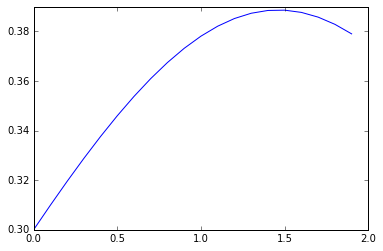

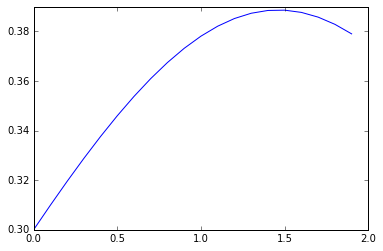

In [21]:
#==========================================================================
# SAMPLE RUN
totTime=2.0
h=0.1
pendMass=0.2
springConst=0.1
length=3.0
initStretch=0.3
initStretchPrime=0.1
gravAccel=0.1
initSwing=0.3
initSwingPrime=0.1
time, y1, y2 = RungeKutta(2.0, 0.1, 0.2, 0.1, 3.0, 0.3, 0.1, 0.1, 0.3, 0.1)
plt.plot(time, y1)
plt.show()
plt.plot(time, y1)
plt.show()